In [6]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#splitting the wave data into a training and a test set
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 0)

#instantiate the model and set tthe number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)

#fit  te model using the training data and training targets
reg.fit(X_train,y_train)

print("Test set predictions: \n{}".format(reg.predict(X_test)))

#R^2 score: coefficient of determination. How goos a prediction is for a regression model. Score beteen 0 and 1
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


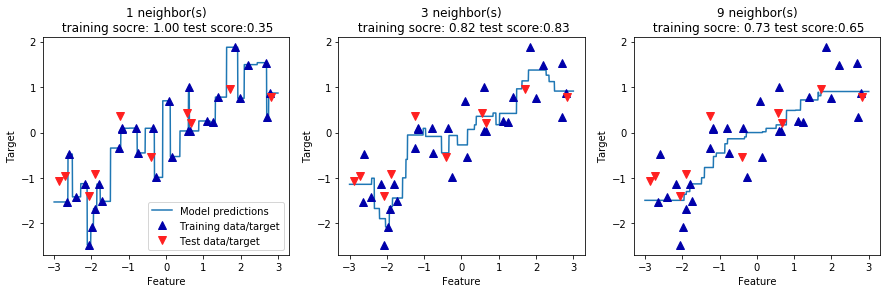

In [15]:
#Analyzing KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt


#visualization of the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(15,4))

#creating 1000 data points, evenly between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n training socre: {:.2f} test score:{:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")